In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib.colors as colors
plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c = const.physical_constants['speed of light in vacuum'][0]
e = const.physical_constants['elementary charge'][0]

path1 = '/mnt/md0/VSim/E301_1_Upramp/'
path2 = '/mnt/md0/VSim/E301_1_Upramp_with_Beam_Ionization/'
simName = 'Drive_Witness_Ramps'

In [2]:
data, attrs = load.load_species(path1, simName, 'ElectronBeam')
N = len(attrs['time'])
time = np.zeros(N)
for i in range(N):
    time[i] = attrs['time'][i]
z = c*time

In [3]:
gamma = np.zeros(N)
gamma_rms = np.zeros(N)
eps_x = np.zeros(N)
eps_y = np.zeros(N)
sigma_x = np.zeros(N)
sigma_y = np.zeros(N)
sigma_xp = np.zeros(N)
sigma_yp = np.zeros(N)
for i in range(N):
    gamma[i] = analyze.get_gamma(data[i])
    gamma_rms[i] = analyze.get_gamma_rms(data[i])
    eps_x[i] = analyze.get_emittance(data[i])*1e-6
    eps_y[i] = analyze.get_emittance_y(data[i])*1e-6
    sigma_x[i] = analyze.get_sigmar(data[i])
    sigma_y[i] = analyze.get_sigmar_y(data[i])
    sigma_xp[i] = analyze.get_sigma_xp(data[i])
    sigma_yp[i] = analyze.get_sigma_yp(data[i])
eps_nx = eps_x*gamma
eps_ny = eps_y*gamma
beta_x = sigma_x**2/eps_x
beta_y = sigma_y**2/eps_y
gamma_x = sigma_xp**2/eps_x
gamma_y = sigma_yp**2/eps_y

In [4]:
# Create the plasma density
z_ne0 = 15e-2 # Start of the uniform plasma
s_ent = 4.9e-2 # sigma of the entrance ramp
ne = np.zeros(N, dtype='double')

# Uniform accelerating plasma
sel_u = z > z_ne0
ne[sel_u] = 1.0

# Entrance ramp
sel_ent = z <= z_ne0
ramp_ent = np.exp(-(z-z_ne0)**2/(2*s_ent**2))
ne[sel_ent] = ramp_ent[sel_ent]
ne *= 3.4e16

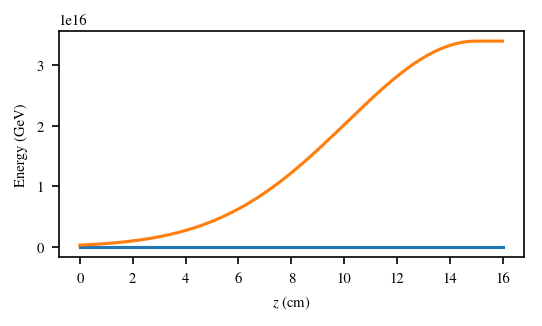

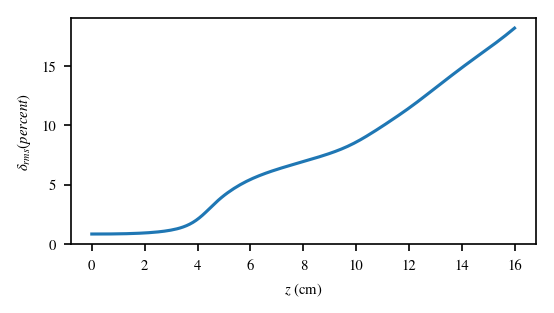

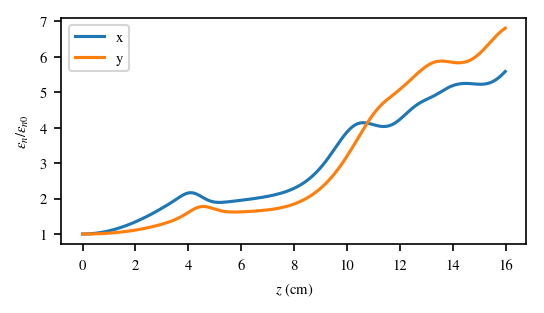

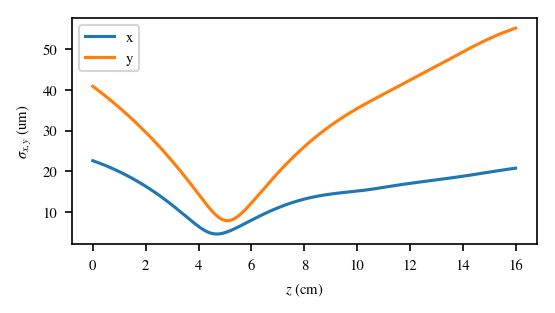

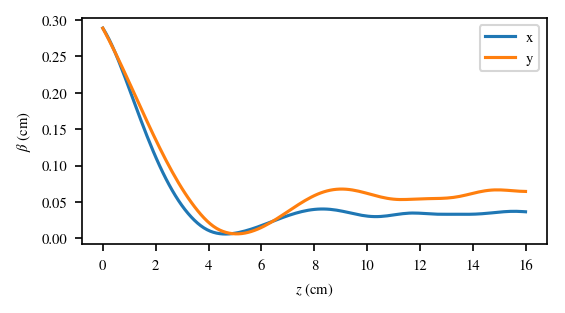

In [5]:
plt.figure(figsize=(4, 2), dpi=150)
plt.plot(z*1e2, gamma*me/1e3)
plt.ylabel(r'Energy (GeV)')
plt.xlabel(r'$z$ (cm)')
plt.show()

plt.figure(figsize=(4, 2), dpi=150)
plt.plot(z*1e2, gamma_rms)
plt.ylabel(r'$\delta_{rms} (percent)$')
plt.xlabel(r'$z$ (cm)')
plt.show()

plt.figure(figsize=(4, 2), dpi=150)
plt.plot(z*1e2, eps_nx/eps_nx[0], label='x')
plt.plot(z*1e2, eps_ny/eps_ny[0], label='y')
plt.ylabel(r'$\epsilon_n/\epsilon_{n0}$')
plt.xlabel(r'$z$ (cm)')
plt.legend()
plt.show()

plt.figure(figsize=(4, 2), dpi=150)
plt.plot(z*1e2, sigma_x*1e6, label='x')
plt.plot(z*1e2, sigma_y*1e6, label='y')
plt.ylabel(r'$\sigma_{x, y}$ (um)')
plt.xlabel(r'$z$ (cm)')
plt.legend()
plt.show()

plt.figure(figsize=(4, 2), dpi=150)
plt.plot(z*1e2, beta_x, label='x')
plt.plot(z*1e2, beta_y, label='y')
plt.ylabel(r'$\beta$ (cm)')
plt.xlabel(r'$z$ (cm)')
plt.legend()
plt.show()